#### Problem_Statement ⬇

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.

Due to Covid Pandemic BloomBikes are suffering considerable drop in revenue.

BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.

Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands

In [1]:
# Filtering the warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Importing all the necessary libraries

# Library for modelling
import statsmodels.api as sm

# Library for train test split
from sklearn.model_selection import train_test_split

# Library for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE

# Library for scaling
from sklearn.preprocessing import MinMaxScaler

# Library for Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [4]:
# Reading the data set

bike = pd.read_csv("day.csv")

In [5]:
# Checking the first 5 rows of the data set

bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# Determining the shape of the datset

bike.shape

(730, 16)

In [7]:

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Fom the above analysis we come to know that dataset has 730 non-null rows and 16 columns

#### We can drop 'instant' column as it does not have any significance apart from it being index number.

#### We have the 'yr' and 'mnth' column separately giving us the relevant information about so we can delete the 'dteday' column as well.

#### We need to analysis on 'cnt' column so we can drop 'casual' and 'registered' columns.

In [8]:
# Dropping the unnecessary columns

bike.drop(['instant','dteday','casual','registered'],axis = 1, inplace = True)


In [9]:
# Checking if the columns have been dropped from the data set

bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [10]:
bike.shape

(730, 12)

#### We dropped 4 columns and now 12 columns are there.

#### we see that there are some variables which are numeric but if converted to categorical will give us more detailed information.

#### We will now convert the 'season' ,'mnth','weekday','weathersit' to categorical variables.

#### Season - We will replace Season Values of 1, 2, 3, 4 to its definition mentioned in explanation ie. Spring, Summer, Fall & Winter Respectively.

In [11]:
bike.season = bike.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})


#### Mnth : We will replace with 1= Jan, 2 = Feb, 3 = Mar, 4 = Apr, 5 = May, 6 = Jun, 7 = Jul, 8 = Aug, 9 = Sep, 10 = Oct, 11 = Nov, 12 = Dec.

In [12]:
bike.mnth = bike.mnth.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

#### Weekday - We will replace with 0 = Sun, 1 = Mon , 2=Tue, 3 = Wed, 4 = Thu, 5 = Fri, 6 = Sat.

In [13]:
bike.weekday = bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

####  Weathersit - We will replace with 1: 'Clear', 2: 'Cloudy_mist', 3: 'Light_Rain_Thunder', 4: 'Heavy_Rain_thunder'.

In [14]:
bike.weathersit = bike.weathersit.map({1: 'Clear',2: 'Cloudy_mist',3: 'Light_Rain_Thunder',4: 'Heavy_Rain_thunder'})

In [15]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


#### We shall visualize the relationship between numeric and categorical variables respectively.

### Visualising the Numeric Variables

<Figure size 1000x800 with 0 Axes>

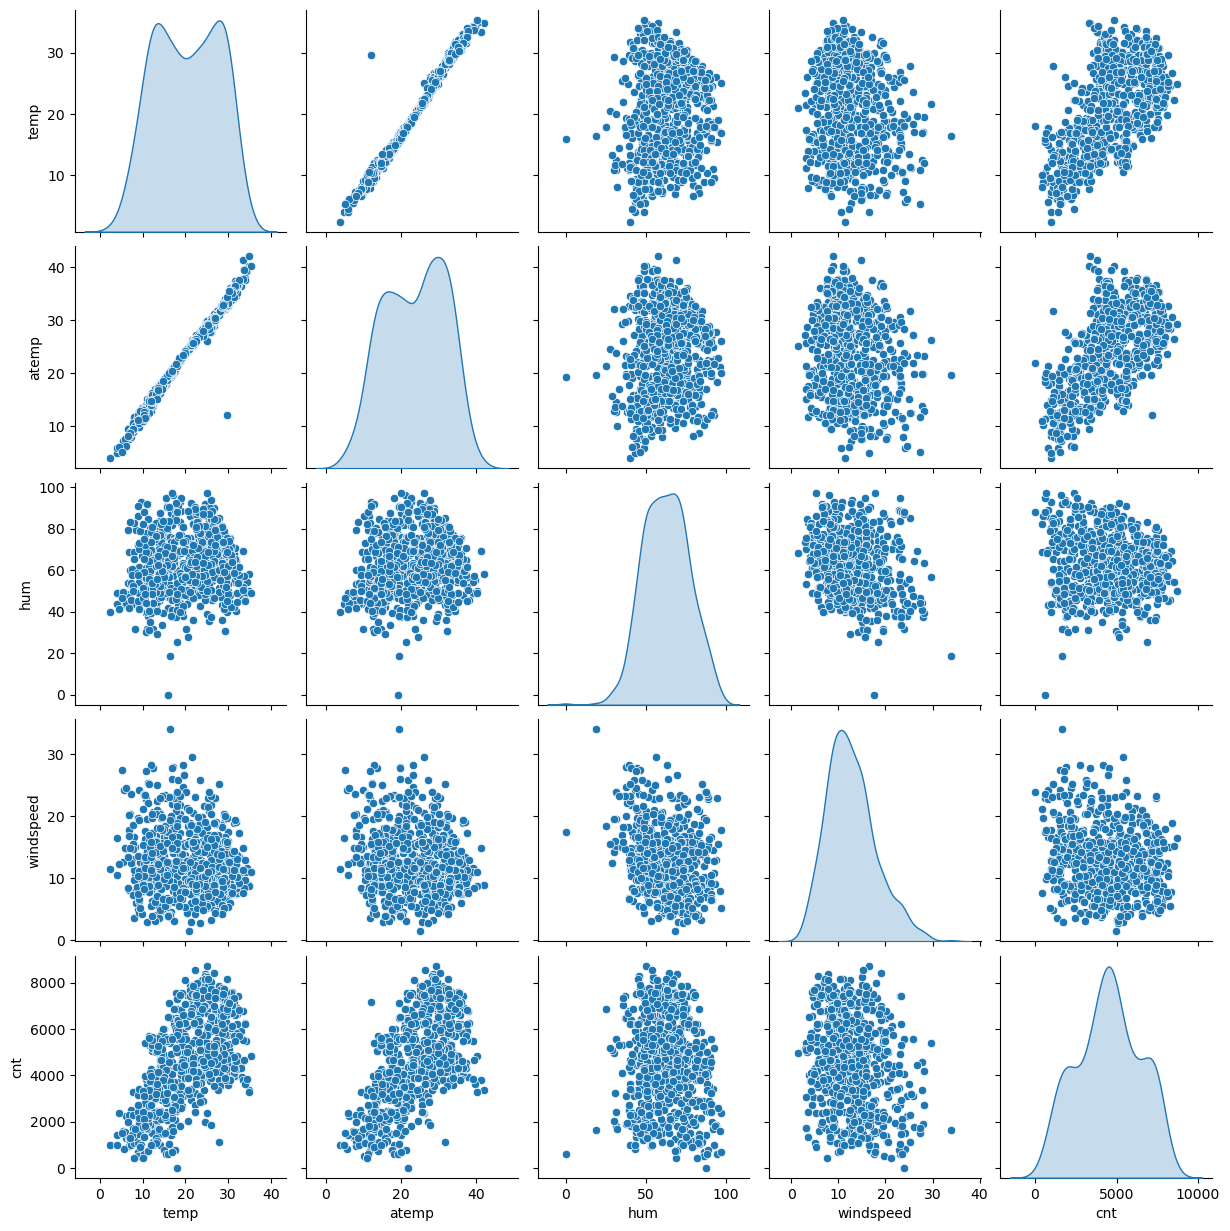

In [16]:
num_vars = bike[['temp', 'atemp', 'hum', 'windspeed','cnt']]

plt.figure(figsize= [10,8])
sns.pairplot(data = bike, vars = num_vars,diag_kind = 'kde')
plt.show()

### Insights from Numerical Data Visualisation

#### **1. We see a very strong relationship between 'temp' and 'atemp as both represent the same data.**
**2. Both variables can't be used due multicollinearity.** 

**3. Both 'temp' and 'atemp' have linear relationship with 'cnt'.**

### Visualising the Categorical Variables

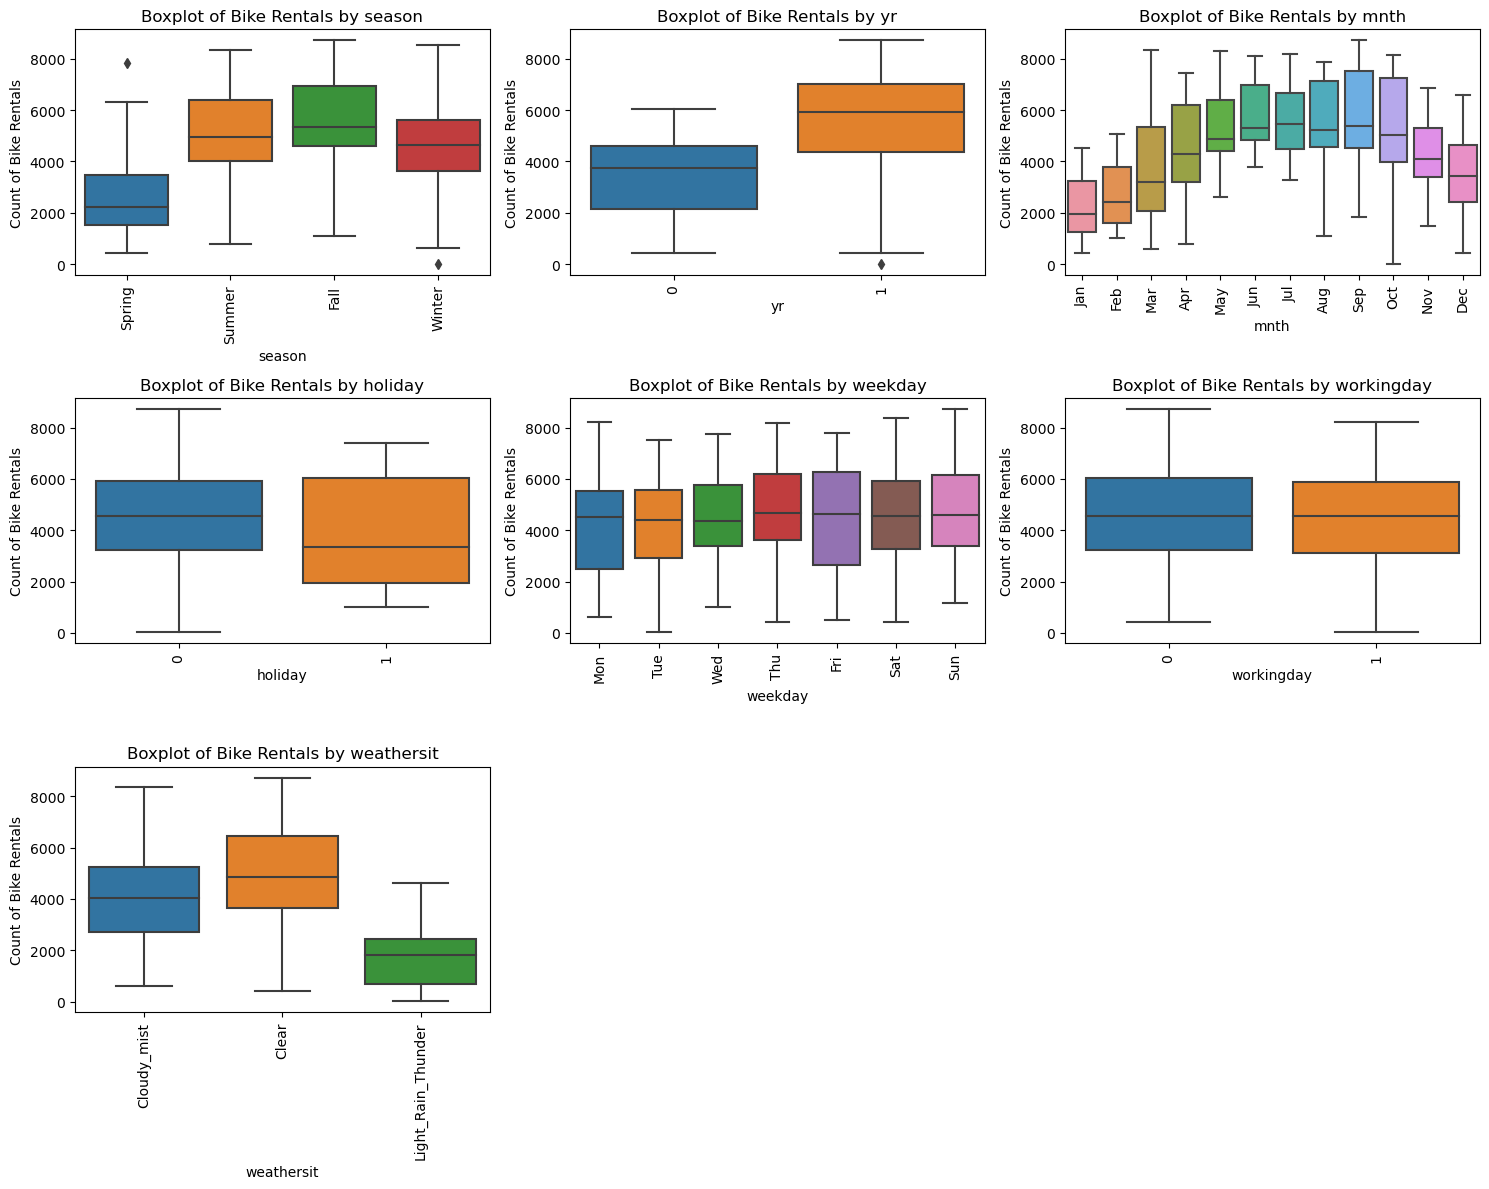

In [17]:
# Function to create boxplot related to categorical columns

cat_vars = ['season', 'yr','mnth', 'holiday', 'weekday','workingday', 'weathersit']

plt.figure(figsize = (15,12))
for i, cat_var in enumerate(cat_vars, 1):
    plt.subplot(3,3,i)
    bike_copy = bike[['cnt', cat_var]].copy()
    sns.boxplot(x = cat_var, y = 'cnt', data = bike_copy)
    plt.title(f'Boxplot of Bike Rentals by {cat_var}')
    plt.xlabel(cat_var)
    plt.ylabel('Count of Bike Rentals')
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.show()

### Insights from Categorical Data Visualisation

**1. Fall has the highest average rental, followed by Summer.**

**2. September tops the monthly rental along with nearby months showing a relationship with the target variable.**

**3. No significant difference in rentals is seen across the weekdays.**

**4. When there is holiday,count of rentals is less.**

**5. Clear weather attracted more bookings which is obvious.**

**6. No. of booking seems to be equal on working days as well as on non-working days.**

**7. In 2019, the number of bookings increased significantly, hence showing a growth in business.**

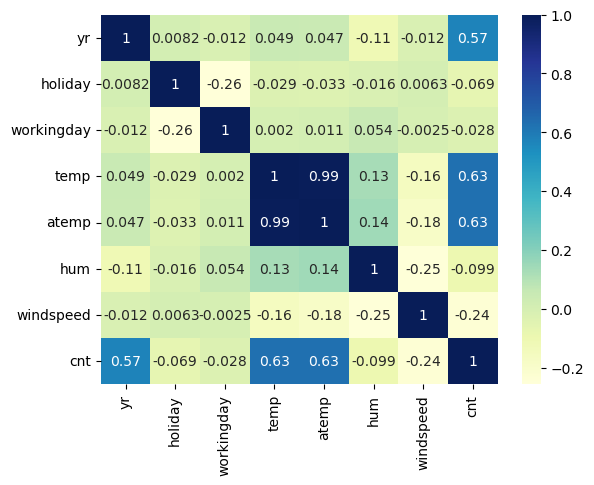

In [18]:
# Checking correlation
sns.heatmap(bike.corr(),cmap="YlGnBu",annot=True)
plt.show()

#### So We can see that Our Target Variable 'cnt' has high correlation with 'temp', 'atemp' & 'yr'.

In [19]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


#### We shall prepare the data by creating Dummy Variables

In [20]:
# Following code does 
#1. Create dummy variable
#2. Drop original variable for which the dummy was created
#3. Drop first dummy variable for each set of dummies created.

bike = pd.get_dummies(bike, drop_first = True)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   yr                             730 non-null    int64  
 1   holiday                        730 non-null    int64  
 2   workingday                     730 non-null    int64  
 3   temp                           730 non-null    float64
 4   atemp                          730 non-null    float64
 5   hum                            730 non-null    float64
 6   windspeed                      730 non-null    float64
 7   cnt                            730 non-null    int64  
 8   season_Spring                  730 non-null    uint8  
 9   season_Summer                  730 non-null    uint8  
 10  season_Winter                  730 non-null    uint8  
 11  mnth_Aug                       730 non-null    uint8  
 12  mnth_Dec                       730 non-null    uin

### We will split the data into Training and Test datasets

In [21]:
# We specify this so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [22]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


In [23]:
# Rescaling the features using MinMaxScaler

scaler = MinMaxScaler()

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy_mist,weathersit_Light_Rain_Thunder
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,1,0


In [24]:
# Checking if all the values are between 0 and 1 

df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy_mist,weathersit_Light_Rain_Thunder
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.343137,0.029412
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


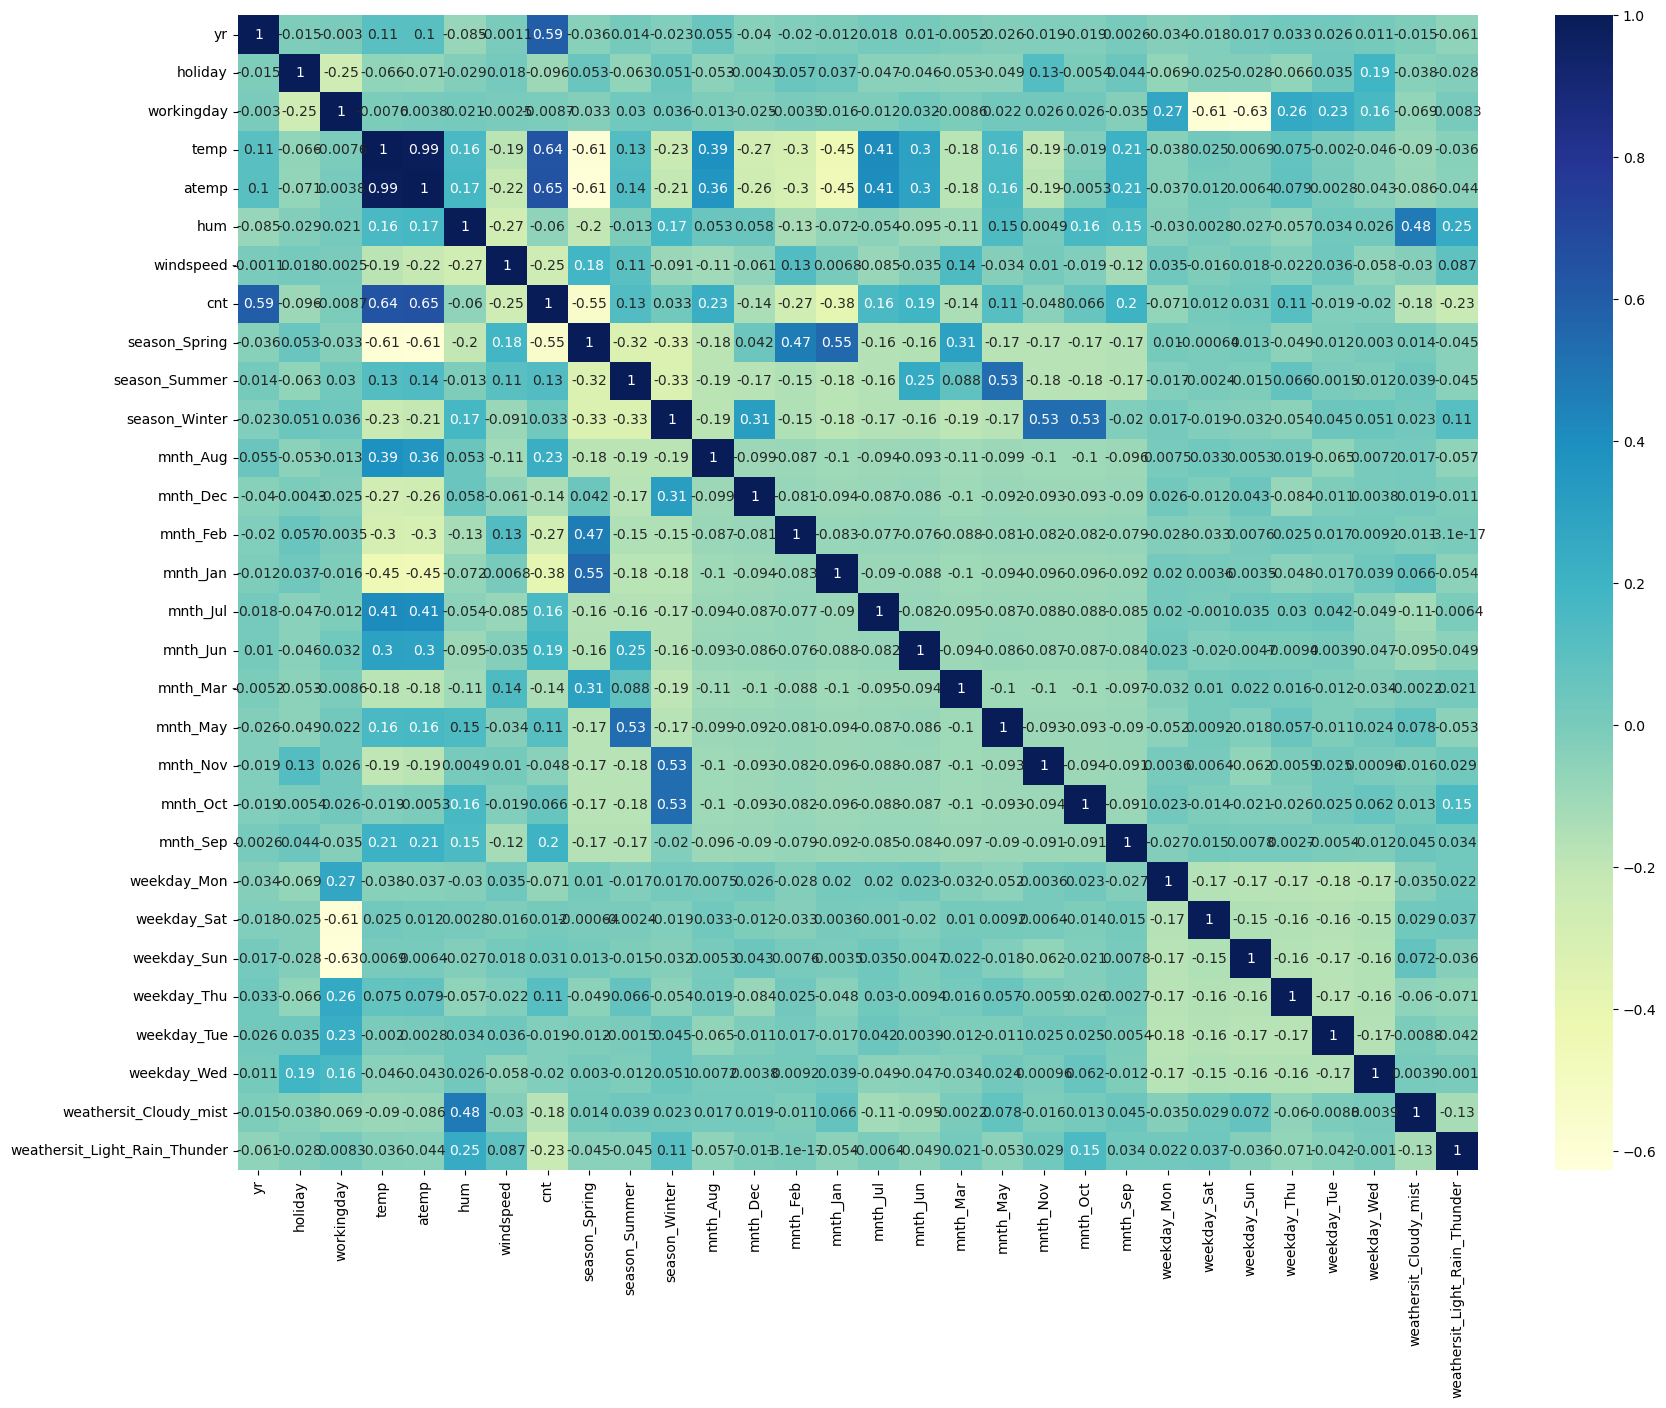

In [25]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### We can see that our target variable 'cnt' has high correlation with 'temp', 'atemp' and 'yr' features.

#### Now the number of variables is 30, which is pretty high. So we shall use hybrid method of modelling. We will first use Automatic method to reduce the number of variables from 30 to 15 and then use Manual method to reduce further.


### Dividing into X and y sets for the model building

In [26]:
y_train = df_train.pop('cnt')
X_train = df_train

In [27]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy_mist,weathersit_Light_Rain_Thunder
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [28]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

#### We will be checking VIF again and again so we shall create a function for checking.

In [29]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

### Model 1: Model Building using all the variables 

In [30]:
# Adding the constant

X_train_lm1 = sm.add_constant(X_train)

#Fit Ordinary Least Squares (OLS) regression model

lr_1 = sm.OLS(y_train,X_train_lm1).fit()

lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     94.48
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          4.09e-178
Time:                        19:50:47   Log-Likelihood:                 523.87
No. Observations:                 510   AIC:                            -987.7
Df Residuals:                     480   BIC:                            -860.7
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.3948      0.085      4.638      0.000       0.228       0.562
yr                                0.2309      0.008     28.359      0.000       0.215       0.247
holiday                          -0.1352      0.065     -2.068      0.039      -0.264      -0.007
workingday                       -0.0609      0.071     -0.856      0.392      -0.201       0.079
temp                              0.4003      0.143      2.790      0.005       0.118       0.682
atemp                             0.0464      0.139      0.333      0.739      -0.227       0.320
hum                              -0.1578      0.039     -4.054      0.000      -0.234      -0.081
windspeed                        -0.1811      0.027     -6.793      0.000      -0.234      -0.129
season_Spring                    -0.0441      0.030     -1.455      0.146      -0.104       0.015
season_Summer                     0.0418      0.027      1.575      0.116      -0.010       0.094
season_Winter                     0.1105      0.028      3.915      0.000       0.055       0.166
mnth_Aug                          0.0230      0.034      0.671      0.503      -0.044       0.091
mnth_Dec                         -0.0457      0.034     -1.347      0.178      -0.112       0.021
mnth_Feb                         -0.0372      0.033     -1.117      0.265      -0.103       0.028
mnth_Jan                         -0.0635      0.034     -1.873      0.062      -0.130       0.003
mnth_Jul                         -0.0339      0.036     -0.953      0.341      -0.104       0.036
mnth_Jun                          0.0021      0.026      0.084      0.933      -0.048       0.052
mnth_Mar                          0.0008      0.025      0.032      0.974      -0.048       0.050
mnth_May                          0.0248      0.021      1.161      0.246      -0.017       0.067
mnth_Nov                         -0.0415      0.037     -1.131      0.259      -0.114       0.031
mnth_Oct                          0.0059      0.036      0.164      0.870      -0.065       0.077
mnth_Sep                          0.0867      0.032      2.680      0.008       0.023       0.150
weekday_Mon                      -0.0247      0.015     -1.691      0.091      -0.053       0.004
weekday_Sat                      -0.0563      0.072     -0.786      0.432      -0.197       0.084
weekday_Sun                      -0.0503      0.072     -0.703      0.482      -0.191       0.090
weekday_Thu                       0.0038      0.015      0.257      0.798      -0.026       0.033
weekday_Tue                      -0.0263      0.015     -1.794      0.074      -0.055       0.003
weekday_Wed                      -0.0112      0.015     -0.736      0.462      -0.041       0.019
weathersit_Cloudy_mist           -0.0593     

In [31]:
# Calculating the VIF for the first model

calculateVIF(X_train)

,Features,VIF
3,temp,442.82
4,atemp,382.51
2,workingday,63.90
5,hum,41.21
7,season_Spring,13.56
9,season_Winter,12.53
23,weekday_Sun,12.35
22,weekday_Sat,11.84
8,season_Summer,9.87
18,mnth_Nov,7.16


#### We generally want VIF less than 5, so there are many varaibales which needs to be dropped. Also some variables have high VIF and high p-value. So now we shall use the RFE method to reduce the variables.

### Recursive Feature Elimination(RFE) - Automatic Method Of Feature Elimination

In [32]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select = 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [33]:
#Checking Which Variables are selected

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 7),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 9),
 ('weekday_Sat', False, 4),
 ('weekday_Sun', False, 5),
 ('weekday_Thu', False, 13),
 ('weekday_Tue', False, 8),
 ('weekday_Wed', False, 11),
 ('weathersit_Cloudy_mist', True, 1),
 ('weathersit_Light_Rain_Thunder', True, 1)]

In [34]:
# Selecting All Columns That RFE Has Selected

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Cloudy_mist',
       'weathersit_Light_Rain_Thunder'],
      dtype='object')

In [35]:
# Cheking The Columns RFE Has Not Selected

X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_Aug', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [36]:
# Creating X_Train Dataset With Only RFE Selected Columns

X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,weathersit_Cloudy_mist,weathersit_Light_Rain_Thunder
653,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,1,0
728,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,1,0


#### We have adjusted our number of columns to 15 only. Hence, now we will start our manual modelling.

#### We will build the model using statsmodel for detailed statistics

### Model 2: Creating the model with columns selected by RFE method.

In [37]:
# Adding the constant

X_train_lm2 = sm.add_constant(X_train_rfe)


lr_2 = sm.OLS(y_train,X_train_lm2).fit()

lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          3.34e-189
Time:                        19:50:48   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.3202      0.036      8.886      0.000       0.249       0.391
yr                                0.2303      0.008     28.511      0.000       0.214       0.246
holiday                          -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp                              0.4800      0.037     12.977      0.000       0.407       0.553
hum                              -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed                        -0.1885      0.026     -7.312      0.000      -0.239      -0.138
season_Spring                    -0.0617      0.021     -2.907      0.004      -0.103      -0.020
season_Summer                     0.0408      0.015      2.659      0.008       0.011       0.071
season_Winter                     0.1034      0.018      5.763      0.000       0.068       0.139
mnth_Dec                         -0.0372      0.017     -2.131      0.034      -0.071      -0.003
mnth_Jan                         -0.0437      0.018     -2.415      0.016      -0.079      -0.008
mnth_Jul                         -0.0555      0.018     -3.046      0.002      -0.091      -0.020
mnth_Nov                         -0.0409      0.019     -2.187      0.029      -0.078      -0.004
mnth_Sep                          0.0749      0.017      4.438      0.000       0.042       0.108
weathersit_Cloudy_mist           -0.0559      0.010     -5.338      0.000      -0.076      -0.035
weathersit_Light_Rain_Thunder    -0.2481      0.026     -9.402      0.000      -0.300      -0.196
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# Calculating the VIF for the second model

calculateVIF(X_train_rfe)

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,season_Spring,4.37
7,season_Winter,4.06
6,season_Summer,2.81
13,weathersit_Cloudy_mist,2.32
0,yr,2.09
11,mnth_Nov,1.83
9,mnth_Jan,1.75


#### The second model itself is giving all p-values < 0.05.

#### But Since We have a high VIF of 30.94 for Humidity, we will drop it.

In [39]:
# Dropping the 'hum' column

X_train_m3 = X_train_rfe.drop(['hum'],axis = 1)
X_train_m3.head()

,yr,holiday,temp,windspeed,season_Spring,season_Summer,season_Winter,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,weathersit_Cloudy_mist,weathersit_Light_Rain_Thunder
653,1,0,0.509887,0.300794,0,0,1,0,0,0,0,0,0,0
576,1,0,0.815169,0.264686,0,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.255342,1,0,0,0,0,0,0,0,1,0
728,1,0,0.245101,0.663106,1,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.188475,0,1,0,0,0,0,0,0,1,0


### Model 3: When we dropped 'hum' column

In [40]:
# Adding the constant

X_train_lm3 = sm.add_constant(X_train_m3)

lr_3 = sm.OLS(y_train,X_train_lm3).fit()

lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          1.57e-186
Time:                        19:50:48   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.2466      0.032      7.679      0.000       0.184       0.310
yr                                0.2343      0.008     28.709      0.000       0.218       0.250
holiday                          -0.0919      0.026     -3.533      0.000      -0.143      -0.041
temp                              0.4377      0.036     12.083      0.000       0.366       0.509
windspeed                        -0.1586      0.025     -6.290      0.000      -0.208      -0.109
season_Spring                    -0.0716      0.021     -3.337      0.001      -0.114      -0.029
season_Summer                     0.0333      0.015      2.148      0.032       0.003       0.064
season_Winter                     0.0887      0.018      4.951      0.000       0.053       0.124
mnth_Dec                         -0.0445      0.018     -2.520      0.012      -0.079      -0.010
mnth_Jan                         -0.0503      0.018     -2.738      0.006      -0.086      -0.014
mnth_Jul                         -0.0504      0.018     -2.725      0.007      -0.087      -0.014
mnth_Nov                         -0.0419      0.019     -2.198      0.028      -0.079      -0.004
mnth_Sep                          0.0682      0.017      3.992      0.000       0.035       0.102
weathersit_Cloudy_mist           -0.0814      0.009     -9.359      0.000      -0.099      -0.064
weathersit_Light_Rain_Thunder    -0.2929      0.025    -11.908      0.000      -0.341      -0.245
==============================================================================
Omnibus:                       70.031   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.566
Skew:                          -0.702   Prob(JB):                     7.52e-39
Kurtosis:                       5.508   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# Calculating the VIF for the third model

calculateVIF(X_train_m3)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,season_Winter,2.94
4,season_Spring,2.89
5,season_Summer,2.23
0,yr,2.07
10,mnth_Nov,1.80
8,mnth_Jan,1.66
9,mnth_Jul,1.59
12,weathersit_Cloudy_mist,1.56


#### Once Again Since All p-values are less than 0.05 we will drop feature havin VIF > 5.**

#### We will drop 'temp' feature.

In [42]:
# Dropping the 'temp' column 

X_train_m4 = X_train_m3.drop(['temp'],axis = 1)
X_train_m4.head()

,yr,holiday,windspeed,season_Spring,season_Summer,season_Winter,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,weathersit_Cloudy_mist,weathersit_Light_Rain_Thunder
653,1,0,0.300794,0,0,1,0,0,0,0,0,0,0
576,1,0,0.264686,0,0,0,0,0,1,0,0,0,0
426,1,0,0.255342,1,0,0,0,0,0,0,0,1,0
728,1,0,0.663106,1,0,0,1,0,0,0,0,0,0
482,1,0,0.188475,0,1,0,0,0,0,0,0,1,0


### Model 4 : When we dropped 'temp' column

In [43]:
# Adding the constant

X_train_lm4 = sm.add_constant(X_train_m4)


lr_4 = sm.OLS(y_train,X_train_lm4).fit()

lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     145.8
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          5.50e-160
Time:                        19:50:48   Log-Likelihood:                 439.69
No. Observations:                 510   AIC:                            -851.4
Df Residuals:                     496   BIC:                            -792.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.5961      0.016     37.557      0.000       0.565       0.627
yr                                0.2454      0.009     26.627      0.000       0.227       0.264
holiday                          -0.0856      0.030     -2.896      0.004      -0.144      -0.028
windspeed                        -0.1903      0.029     -6.675      0.000      -0.246      -0.134
season_Spring                    -0.2503      0.018    -14.146      0.000      -0.285      -0.216
season_Summer                    -0.0511      0.016     -3.252      0.001      -0.082      -0.020
season_Winter                    -0.0213      0.018     -1.216      0.225      -0.056       0.013
mnth_Dec                         -0.1100      0.019     -5.752      0.000      -0.148      -0.072
mnth_Jan                         -0.1202      0.020     -6.069      0.000      -0.159      -0.081
mnth_Jul                         -0.0186      0.021     -0.894      0.372      -0.059       0.022
mnth_Nov                         -0.1013      0.021     -4.847      0.000      -0.142      -0.060
mnth_Sep                          0.0530      0.019      2.735      0.006       0.015       0.091
weathersit_Cloudy_mist           -0.0882      0.010     -8.938      0.000      -0.108      -0.069
weathersit_Light_Rain_Thunder    -0.3127      0.028    -11.207      0.000      -0.367      -0.258
==============================================================================
Omnibus:                       56.767   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.173
Skew:                          -0.589   Prob(JB):                     4.44e-30
Kurtosis:                       5.230   Cond. No.                         9.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# Calculating the VIF for the fourth model

calculateVIF(X_train_m4)

,Features,VIF
2,windspeed,3.88
3,season_Spring,2.89
5,season_Winter,2.84
4,season_Summer,2.01
0,yr,1.83
9,mnth_Nov,1.79
7,mnth_Jan,1.64
11,weathersit_Cloudy_mist,1.52
6,mnth_Dec,1.45
8,mnth_Jul,1.20


#### Interestingly We see that as we drop Temp feature p-values of July & winter has increased. So we would rather Keep temp & remove winter as it has high VIF and high p-value as compared to July.

In [45]:
#  Dropping the 'season_Winter' column

X_train_m5 = X_train_m3.drop(['season_Winter'],axis = 1)
X_train_m5.head()

,yr,holiday,temp,windspeed,season_Spring,season_Summer,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,weathersit_Cloudy_mist,weathersit_Light_Rain_Thunder
653,1,0,0.509887,0.300794,0,0,0,0,0,0,0,0,0
576,1,0,0.815169,0.264686,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.255342,1,0,0,0,0,0,0,1,0
728,1,0,0.245101,0.663106,1,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.188475,0,1,0,0,0,0,0,1,0


### Model 5: When we kept 'temp' and dropped 'season_Winter'

In [46]:
# Adding the constant

X_train_lm5 = sm.add_constant(X_train_m5)


lr_5 = sm.OLS(y_train,X_train_lm5).fit()

lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     188.9
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          1.66e-182
Time:                        19:50:48   Log-Likelihood:                 493.28
No. Observations:                 510   AIC:                            -958.6
Df Residuals:                     496   BIC:                            -899.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.3474      0.025     13.656      0.000       0.297       0.397
yr                                0.2362      0.008     28.310      0.000       0.220       0.253
holiday                          -0.0905      0.027     -3.399      0.001      -0.143      -0.038
temp                              0.3465      0.032     10.855      0.000       0.284       0.409
windspeed                        -0.1623      0.026     -6.291      0.000      -0.213      -0.112
season_Spring                    -0.1430      0.016     -8.786      0.000      -0.175      -0.111
season_Summer                    -0.0139      0.012     -1.116      0.265      -0.038       0.011
mnth_Dec                         -0.0315      0.018     -1.762      0.079      -0.067       0.004
mnth_Jan                         -0.0602      0.019     -3.221      0.001      -0.097      -0.023
mnth_Jul                         -0.0729      0.018     -3.972      0.000      -0.109      -0.037
mnth_Nov                         -0.0183      0.019     -0.971      0.332      -0.055       0.019
mnth_Sep                          0.0497      0.017      2.911      0.004       0.016       0.083
weathersit_Cloudy_mist           -0.0810      0.009     -9.099      0.000      -0.099      -0.064
weathersit_Light_Rain_Thunder    -0.2850      0.025    -11.346      0.000      -0.334      -0.236
==============================================================================
Omnibus:                       54.321   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.207
Skew:                          -0.580   Prob(JB):                     1.76e-27
Kurtosis:                       5.110   Cond. No.                         15.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# Calculating the VIF for the fifth model

calculateVIF(X_train_m5)

,Features,VIF
2,temp,4.99
3,windspeed,4.44
4,season_Spring,2.48
0,yr,2.06
5,season_Summer,1.93
7,mnth_Jan,1.63
11,weathersit_Cloudy_mist,1.53
8,mnth_Jul,1.49
10,mnth_Sep,1.34
9,mnth_Nov,1.26


#### We see that p-values of Summer and November are high. We will drop Summer  as it has high VIF and low p-value as compared to November.

In [48]:
#  Dropping the 'season_Winter' column

X_train_m6 = X_train_m5.drop(['season_Summer'],axis = 1)
X_train_m6.head()

,yr,holiday,temp,windspeed,season_Spring,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,weathersit_Cloudy_mist,weathersit_Light_Rain_Thunder
653,1,0,0.509887,0.300794,0,0,0,0,0,0,0,0
576,1,0,0.815169,0.264686,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.255342,1,0,0,0,0,0,1,0
728,1,0,0.245101,0.663106,1,1,0,0,0,0,0,0
482,1,0,0.395666,0.188475,0,0,0,0,0,0,1,0


### Model 6: When we dropped 'season_Summer'

In [49]:
# Adding the constant

X_train_lm6 = sm.add_constant(X_train_m6)


lr_6 = sm.OLS(y_train,X_train_lm6).fit()

lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     204.4
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          2.11e-183
Time:                        19:50:49   Log-Likelihood:                 492.64
No. Observations:                 510   AIC:                            -959.3
Df Residuals:                     497   BIC:                            -904.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.3367      0.024     14.279      0.000       0.290       0.383
yr                                0.2362      0.008     28.303      0.000       0.220       0.253
holiday                          -0.0907      0.027     -3.405      0.001      -0.143      -0.038
temp                              0.3538      0.031     11.315      0.000       0.292       0.415
windspeed                        -0.1660      0.026     -6.490      0.000      -0.216      -0.116
season_Spring                    -0.1345      0.014     -9.360      0.000      -0.163      -0.106
mnth_Dec                         -0.0248      0.017     -1.473      0.141      -0.058       0.008
mnth_Jan                         -0.0583      0.019     -3.134      0.002      -0.095      -0.022
mnth_Jul                         -0.0675      0.018     -3.812      0.000      -0.102      -0.033
mnth_Nov                         -0.0094      0.017     -0.549      0.583      -0.043       0.024
mnth_Sep                          0.0561      0.016      3.498      0.001       0.025       0.088
weathersit_Cloudy_mist           -0.0811      0.009     -9.107      0.000      -0.099      -0.064
weathersit_Light_Rain_Thunder    -0.2822      0.025    -11.288      0.000      -0.331      -0.233
==============================================================================
Omnibus:                       51.301   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.419
Skew:                          -0.560   Prob(JB):                     3.88e-25
Kurtosis:                       5.009   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Calculating the VIF for the sixth model

calculateVIF(X_train_m6)

,Features,VIF
2,temp,4.64
3,windspeed,4.01
4,season_Spring,2.20
0,yr,2.05
6,mnth_Jan,1.63
10,weathersit_Cloudy_mist,1.52
7,mnth_Jul,1.34
9,mnth_Sep,1.21
8,mnth_Nov,1.16
5,mnth_Dec,1.10


#### We see that p-values of December and November are high. We will drop November  as it has high VIF and high p-value as compared to December.

In [51]:
#  Dropping the 'mnth_Nov' column

X_train_m7 = X_train_m6.drop(['mnth_Nov'],axis = 1)
X_train_m7.head()

,yr,holiday,temp,windspeed,season_Spring,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Sep,weathersit_Cloudy_mist,weathersit_Light_Rain_Thunder
653,1,0,0.509887,0.300794,0,0,0,0,0,0,0
576,1,0,0.815169,0.264686,0,0,0,1,0,0,0
426,1,0,0.442393,0.255342,1,0,0,0,0,1,0
728,1,0,0.245101,0.663106,1,1,0,0,0,0,0
482,1,0,0.395666,0.188475,0,0,0,0,0,1,0


### Model 7: When we dropped 'mnth_Nov'

In [52]:
# Adding the constant

X_train_lm7 = sm.add_constant(X_train_m7)


lr_7 = sm.OLS(y_train,X_train_lm7).fit()

lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     223.3
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          1.60e-184
Time:                        19:50:49   Log-Likelihood:                 492.49
No. Observations:                 510   AIC:                            -961.0
Df Residuals:                     498   BIC:                            -910.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.3307      0.021     15.826      0.000       0.290       0.372
yr                                0.2361      0.008     28.317      0.000       0.220       0.252
holiday                          -0.0927      0.026     -3.516      0.000      -0.144      -0.041
temp                              0.3610      0.028     12.759      0.000       0.305       0.417
windspeed                        -0.1653      0.026     -6.475      0.000      -0.215      -0.115
season_Spring                    -0.1316      0.013     -9.825      0.000      -0.158      -0.105
mnth_Dec                         -0.0223      0.016     -1.377      0.169      -0.054       0.010
mnth_Jan                         -0.0569      0.018     -3.090      0.002      -0.093      -0.021
mnth_Jul                         -0.0680      0.018     -3.846      0.000      -0.103      -0.033
mnth_Sep                          0.0569      0.016      3.563      0.000       0.026       0.088
weathersit_Cloudy_mist           -0.0809      0.009     -9.098      0.000      -0.098      -0.063
weathersit_Light_Rain_Thunder    -0.2819      0.025    -11.287      0.000      -0.331      -0.233
==============================================================================
Omnibus:                       50.719   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.150
Skew:                          -0.554   Prob(JB):                     7.31e-25
Kurtosis:                       5.001   Cond. No.                         12.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# Calculating the VIF for the seventh model

calculateVIF(X_train_m7)

,Features,VIF
2,temp,4.63
3,windspeed,3.84
4,season_Spring,2.14
0,yr,2.04
6,mnth_Jan,1.63
9,weathersit_Cloudy_mist,1.51
7,mnth_Jul,1.33
8,mnth_Sep,1.20
5,mnth_Dec,1.10
10,weathersit_Light_Rain_Thunder,1.06


#### Since 'mnth_Dec' has high p-value so we will drop it.

In [54]:
#  Dropping the 'mnth_Dec' column

X_train_m8 = X_train_m7.drop(['mnth_Dec'],axis = 1)
X_train_m8.head()

,yr,holiday,temp,windspeed,season_Spring,mnth_Jan,mnth_Jul,mnth_Sep,weathersit_Cloudy_mist,weathersit_Light_Rain_Thunder
653,1,0,0.509887,0.300794,0,0,0,0,0,0
576,1,0,0.815169,0.264686,0,0,1,0,0,0
426,1,0,0.442393,0.255342,1,0,0,0,1,0
728,1,0,0.245101,0.663106,1,0,0,0,0,0
482,1,0,0.395666,0.188475,0,0,0,0,1,0


### Model 8: When we dropped 'mnth_Dec'

In [55]:
# Adding the constant

X_train_lm8 = sm.add_constant(X_train_m8)


lr_8 = sm.OLS(y_train,X_train_lm8).fit()

lr_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     245.0
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          2.56e-185
Time:                        19:50:49   Log-Likelihood:                 491.52
No. Observations:                 510   AIC:                            -961.0
Df Residuals:                     499   BIC:                            -914.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.3193      0.019     16.630      0.000       0.282       0.357
yr                                0.2361      0.008     28.288      0.000       0.220       0.252
holiday                          -0.0920      0.026     -3.489      0.001      -0.144      -0.040
temp                              0.3744      0.027     14.069      0.000       0.322       0.427
windspeed                        -0.1605      0.025     -6.341      0.000      -0.210      -0.111
season_Spring                    -0.1305      0.013     -9.750      0.000      -0.157      -0.104
mnth_Jan                         -0.0511      0.018     -2.849      0.005      -0.086      -0.016
mnth_Jul                         -0.0694      0.018     -3.930      0.000      -0.104      -0.035
mnth_Sep                          0.0577      0.016      3.613      0.000       0.026       0.089
weathersit_Cloudy_mist           -0.0808      0.009     -9.080      0.000      -0.098      -0.063
weathersit_Light_Rain_Thunder    -0.2807      0.025    -11.233      0.000      -0.330      -0.232
==============================================================================
Omnibus:                       49.193   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.324
Skew:                          -0.540   Prob(JB):                     4.95e-24
Kurtosis:                       4.971   Cond. No.                         11.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# Calculating the VIF for the eighth model

calculateVIF(X_train_m8)

,Features,VIF
2,temp,4.63
3,windspeed,3.82
4,season_Spring,2.11
0,yr,2.04
5,mnth_Jan,1.60
8,weathersit_Cloudy_mist,1.50
6,mnth_Jul,1.33
7,mnth_Sep,1.20
9,weathersit_Light_Rain_Thunder,1.06
1,holiday,1.03


#### We have the best fitting model with 10 features having p-values <0.05 and VIF < 5.

In [57]:
#Checking coefficients of parameters
lr_8.params

const                            0.319316
yr                               0.236056
holiday                         -0.092033
temp                             0.374365
windspeed                       -0.160486
season_Spring                   -0.130495
mnth_Jan                        -0.051131
mnth_Jul                        -0.069366
mnth_Sep                         0.057732
weathersit_Cloudy_mist          -0.080802
weathersit_Light_Rain_Thunder   -0.280674
dtype: float64

#### We See That F-sattistic value is 245 & its p-value is also less than 1 approx 0; which proves that model is significant.

#### We can see that the equation of our best fitted line is:

**cnt = 0.319316 * const + 0.236056 * yr - 0.092033 * holiday + 0.374365 * temp -0.160486 * windspeed - 0.130495 * season_Spring  -0.051131 * mnth_Jan - 0.069366 * mnth_Jul + 0.057732 * mnth_Sep - 0.080802 * weathersit_Cloudy_mist - 0.280674 * weathersit_Light_Rain_Thunder** 

### Residual Analysis of the train data

In [58]:
y_train_pred = lr_8.predict(X_train_lm8)

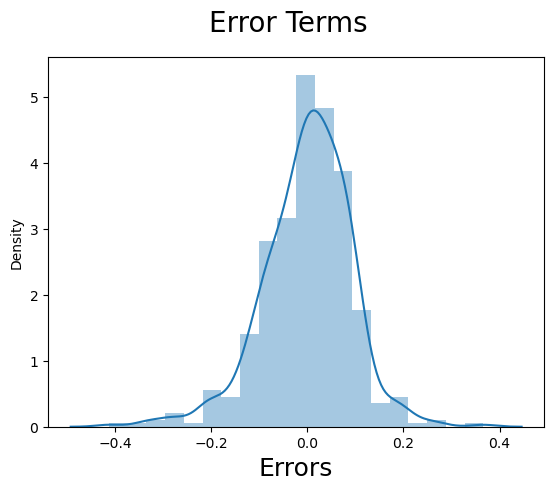

In [59]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

**We can see that Residual Plot is symmetrical**

### Validation Model on the Test set

In [60]:
# Applying the scaling on the test sets


num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']


df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy_mist,weathersit_Light_Rain_Thunder
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,0,0


In [61]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy_mist,weathersit_Light_Rain_Thunder
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.319635,0.027397
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
# Divinding the X_test and y_test

y_test = df_test.pop('cnt')
X_test = df_test

In [63]:
# Adding a constant variable to test dataset

X_test_sm = sm.add_constant(X_test)


In [64]:
# Selecting columns of Final Predicted model

col1 = X_train_lm8.columns

X_test_lm8 = X_test_sm[col1]

X_test_lm8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   const                          219 non-null    float64
 1   yr                             219 non-null    int64  
 2   holiday                        219 non-null    int64  
 3   temp                           219 non-null    float64
 4   windspeed                      219 non-null    float64
 5   season_Spring                  219 non-null    uint8  
 6   mnth_Jan                       219 non-null    uint8  
 7   mnth_Jul                       219 non-null    uint8  
 8   mnth_Sep                       219 non-null    uint8  
 9   weathersit_Cloudy_mist         219 non-null    uint8  
 10  weathersit_Light_Rain_Thunder  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.5 KB


In [65]:
# Making predictions using the final model

y_test_pred = lr_8.predict(X_test_lm8)

### Model Evaluation

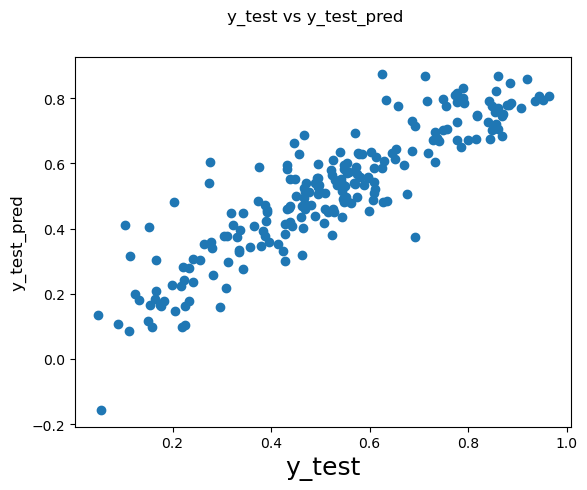

In [66]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 12)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 12)
plt.show()

#### Calculating R-squared score on the test set

In [67]:
r2 = r2_score(y_true = y_test,y_pred = y_test_pred)
r2

0.7990985640536401

#### Calculating Adjusted R-squared score on the test set

In [68]:
# n is number of rows in test dataset
n = X_test_lm8.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test_lm8.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = (1-(1-r2)*(n-1)/(n-p-1))
adjusted_r2

0.7884226423366838

**We see that r2 & Adjusted r2 are very close to each other 79% & 78% respectively.**

**So we can say that whatever this model has learnt from train set is generlized on test set pretty well**

### Summary

**1. Year (yr) has a positive coefficient which means that from 2018 to 2019 the demand for bike rentals has increased.**

**2. Temperature(temp) also has a positive coefficient which means that it impacts the number of rentals.**

**3. Light,Rain and Thunderstormm play a negative impact on the demand for rental bikes.**